In [1]:
# Import libraries:
import json
import pandas as pd
from copy import deepcopy
from bs4 import BeautifulSoup
from urllib.request import urlopen

# Import plotting libraries:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

In [2]:
shots_df = pd.read_csv(r'E:\2nd year\3rd sem\Data science\Project\FInal_DF\Shots.csv')

In [3]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "#1B1B1A"
line_color = "white"
line_width = 2.

In [4]:
full_pitch_shots_df = deepcopy(shots_df)

In [5]:
full_pitch_shots_df["X"] = full_pitch_shots_df["X"].multiply(x_lims[1])
full_pitch_shots_df["Y"] = full_pitch_shots_df["Y"].multiply(y_lims[1])

In [6]:
full_pitch_shots_df

,Unnamed: 0,id,minute,result,X,Y,xG,player,h_a,player_id,...,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,205,479846,20,MissedShots,1.07640,0.37222,0.484085,Erling Haaland,a,8260,...,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Phil Foden,Cross
1,206,479847,35,Goal,1.01775,0.37000,0.761169,Erling Haaland,a,8260,...,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,NaN,Standard
2,207,479854,64,Goal,0.99360,0.29970,0.328053,Erling Haaland,a,8260,...,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Kevin De Bruyne,Throughball
3,208,479855,69,MissedShots,1.09595,0.40848,0.526608,Erling Haaland,a,8260,...,2022,Head,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Jack Grealish,Chipped
4,209,479856,75,BlockedShot,1.02810,0.52540,0.066443,Erling Haaland,a,8260,...,2022,LeftFoot,18211,West Ham,Manchester City,0,2,2022-08-07 15:30:00,Ilkay Gündogan,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47648,275326,522509,86,BlockedShot,0.99820,0.37962,0.030797,Raimonds Krollis,h,11326,...,2022,OtherBodyPart,18900,Spezia,Monza,0,2,2023-04-28 18:45:00,Tio Cipot,Cross
47649,275327,505551,90,SavedShot,0.84295,0.41440,0.017026,Tio Cipot,a,11327,...,2022,RightFoot,18773,Bologna,Spezia,2,0,2023-01-27 17:30:00,Emmanuel Gyasi,Pass
47650,275328,514577,85,MissedShots,0.85560,0.40404,0.013358,Tio Cipot,a,11327,...,2022,LeftFoot,18849,Sassuolo,Spezia,1,0,2023-03-17 17:30:00,NaN,NaN
47651,275329,521476,93,SavedShot,1.06145,0.39072,0.067531,Alberto Basso,a,11482,...,2022,Head,18887,Udinese,Cremonese,3,0,2023-04-23 13:00:00,Emanuele Valeri,Aerial


In [14]:
def create_full_pitch(x_lims, y_lims, background_color="#2c2f36", line_color="white", line_width=2.):
    """
    Function to create a full-scale pitch based on input dimensions
    :params:
    x_lims: min and max limits for the length of the field
    y_lims: min and max limits for the width/breadth of the field
    background_color: Background color of the field
    line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
    line_width: The thickness of the outer and center lines
    """
    # Create figure:
    fig = plt.figure(facecolor=background_color, figsize=(12, 7))
    ax = fig.add_subplot(111, facecolor=background_color)

    # Pitch Outline & Centre Line
    plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
    plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
    plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
    plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
    plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

    # Left Penalty Area
    plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

    # Right Penalty Area
    plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

    # Left 6yd box Area
    plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

    # # Right 6yd box Area
    plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
    plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

    # Prepare Circles
    centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
    centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
    left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
    right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

    # Draw Circles
    ax.add_patch(centre_circle)
    ax.add_patch(centre_spot)
    ax.add_patch(left_pen_spot)
    ax.add_patch(right_pen_spot)

    # Prepare Arcs
    left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
    right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

    # Draw Arcs
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)

    plt.axis("off")

<Axes: xlabel='X', ylabel='Y'>

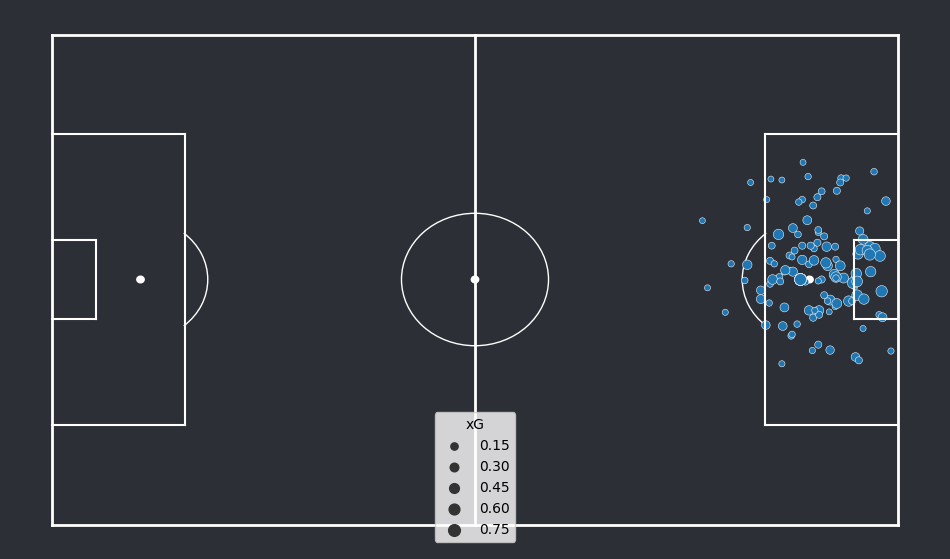

In [17]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=full_pitch_shots_df[full_pitch_shots_df["player"] == "Erling Haaland"], size="xG", ax=ax1)



<Axes: xlabel='X', ylabel='Y'>

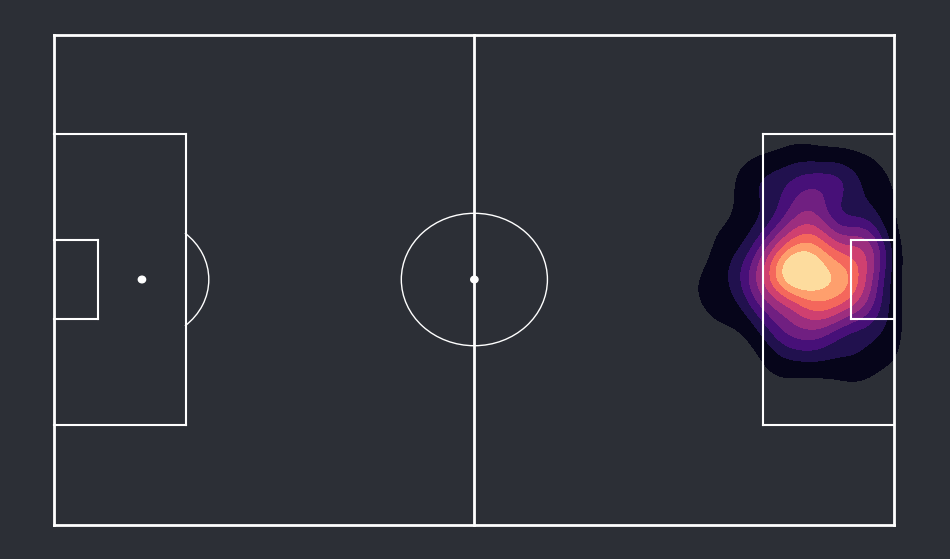

In [22]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=full_pitch_shots_df[full_pitch_shots_df["player"] == "Erling Haaland"], fill=True, n_levels=10, ax=ax1,cmap= "magma")